In [128]:
import matplotlib.pyplot as plot
import numpy as np
import os
%matplotlib inline

In [4]:
folder_name = "./Dataset/TrainData/"
file_names = os.listdir(folder_name)
file_names = [folder_name + file_name for file_name in file_names]
images = [plot.imread(file_name) for file_name in file_names]
images = np.array(images)

In [3]:
n = images.shape[0]
print("Shape:", images.shape)

Shape: (2952, 256, 256, 3)


# Extract Features

In [4]:
gray_images = np.mean(images, axis=3)

In [5]:
means = np.mean(gray_images, axis=(1, 2))
assert means.shape == (n,)

In [6]:
medians = np.median(gray_images, axis=(1, 2))
assert medians.shape == (n,)

In [9]:
maxes = np.max(gray_images, axis=(1, 2))
mins = np.min(gray_images, axis=(1, 2))
mid_ranges = (maxes + mins) / 2
assert mid_ranges.shape == (n,)

In [10]:
flat_gray_images = np.reshape(gray_images, (n, -1))
assert flat_gray_images.shape == (n, 256 * 256)

In [11]:
sorted_images = np.sort(flat_gray_images, axis=1)

In [12]:
quartile_size = int((256 * 256) / 4)
q_ones = sorted_images[:, quartile_size]
q_threes = sorted_images[:, quartile_size * 3]
IQRs = q_threes - q_ones
assert IQRs.shape == (n,)

In [13]:
std_devs = np.std(gray_images, axis=(1, 2))
assert std_devs.shape == (n,)

## Showdown

In [29]:
from pandas import DataFrame

In [79]:
data = np.array([means, medians, mid_ranges, IQRs, std_devs, file_names]).T
columns = ["Mean", "Median", "Mid Range", "IQR", "Std Dev", "File Name"]
df = DataFrame(data, columns=columns)

In [91]:
df['Mean'] = df['Mean'].astype(np.float64)
df['Median'] = df['Median'].astype(np.float64)
df['Mid Range'] = df['Mid Range'].astype(np.float64)
df['IQR'] = df['IQR'].astype(np.float64)
df['Std Dev'] = df['Std Dev'].astype(np.float64)
df['File Name'] = df['File Name'].astype(np.str)

In [44]:
df.to_csv("./Dataset/train.csv")

In [19]:
car = plot.imread("./Dataset/TestData/car14-045-270.png")

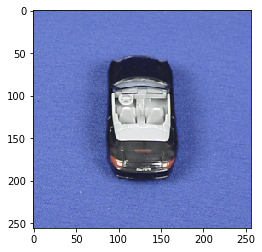

In [20]:
plot.imshow(car)

In [108]:
feature = [
    np.mean(car),
    np.median(car),
    (np.max(car) + np.min(car)) / 2,
]
flat_car = car.reshape((-1))
sorted_car = np.sort(flat_car)
q1 = sorted_car[quartile_size]
q3 = sorted_car[quartile_size * 3]
feature.append(q3 - q1)
feature.append(np.std(car))

In [109]:
feature

In [118]:
def euclidean_dist(df: DataFrame):
    cols = ['Mean', 'Median', 'Mid Range', 'IQR', 'Std Dev']
    df = df[cols]
    for i, col in enumerate(cols):
        df[col] = (df[col] - feature[i]) ** 2
    diff_col = df.sum(axis=1)
    return diff_col

In [129]:
new_df = (df.copy()
          .assign(sort_col=euclidean_dist)
          .sort_values('sort_col'))

(2952, 5) (2952,)


D:\Software\Study\Anaconda3\envs\data-mining\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [131]:
best_match = new_df.iloc[:20]

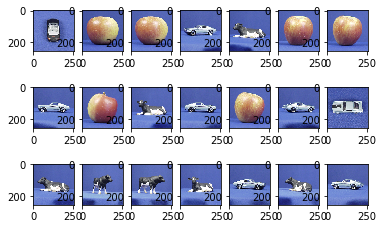

In [140]:
plot.subplot(3, 7, 1)
plot.imshow(car)

for pos, i in enumerate(best_match.index):
    plot.subplot(3, 7, pos+2)
    plot.imshow(images[i])